In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
## Download the most recent dataset from StatistikZH's github repo
dataset = pd.read_csv(
    "https://raw.githubusercontent.com/statistikZH/covid19monitoring_economy_SHAB/master/Economy_SHAB_branchen.csv",
    parse_dates = ["date"]
)

In [3]:
## Let's look at the data
dataset.head()

,date,value,topic,variable_short,variable_long,location,unit,source,update,public,description
0,2017-01-03,1,Wirtschaft,konk_eroeff_noga_G,Anzahl Eröffnungen erstmaliger Konkursverfahre...,LU,Anzahl,SHAB via Moneyhouse API,wöchentlich,ja,https://github.com/statistikZH/covid19monitori...
1,2017-01-03,1,Wirtschaft,konk_eroeff_noga_C,Anzahl Eröffnungen erstmaliger Konkursverfahre...,SG,Anzahl,SHAB via Moneyhouse API,wöchentlich,ja,https://github.com/statistikZH/covid19monitori...
2,2017-01-06,1,Wirtschaft,konk_eroeff_noga_M,Anzahl Eröffnungen erstmaliger Konkursverfahre...,OW,Anzahl,SHAB via Moneyhouse API,wöchentlich,ja,https://github.com/statistikZH/covid19monitori...
3,2017-01-09,1,Wirtschaft,konk_eroeff_noga_K,Anzahl Eröffnungen erstmaliger Konkursverfahre...,GE,Anzahl,SHAB via Moneyhouse API,wöchentlich,ja,https://github.com/statistikZH/covid19monitori...
4,2017-01-09,1,Wirtschaft,konk_eroeff_noga_N,Anzahl Eröffnungen erstmaliger Konkursverfahre...,GE,Anzahl,SHAB via Moneyhouse API,wöchentlich,ja,https://github.com/statistikZH/covid19monitori...


In [4]:
## Inspect data we probably don't need
print(dataset["topic"].unique())
print(dataset["unit"].unique())
print(dataset["source"].unique())
print(dataset["update"].unique())
print(dataset["public"].unique())
print(dataset["description"].unique())

['Wirtschaft']
['Anzahl']
['SHAB via Moneyhouse API']
['wöchentlich']
['ja']
['https://github.com/statistikZH/covid19monitoring_economy_SHAB']


In [5]:
## Copy for further manipulation
dataset2 = dataset.copy()

In [6]:
## Drop columns we don't need
dataset2.drop(labels = 
              ["value", "topic", "variable_long", "unit", "source", "update", "public", "description"], 
              axis = "columns",
              inplace = True)

In [7]:
## Let's look at the data again
dataset2.head()

,date,variable_short,location
0,2017-01-03,konk_eroeff_noga_G,LU
1,2017-01-03,konk_eroeff_noga_C,SG
2,2017-01-06,konk_eroeff_noga_M,OW
3,2017-01-09,konk_eroeff_noga_K,GE
4,2017-01-09,konk_eroeff_noga_N,GE


In [8]:
## Create Mapper that maps NOGA codes to verbose description
noga_codes_mapper = {
    'konk_eroeff_noga_A' : "Land- und Forstwirtschaft, Fischerei",
    'konk_eroeff_noga_B' : "Bergbau und Gewinnung von Steinen und Erden",
    'konk_eroeff_noga_C' : "Verarbeitendes Gewerbe/Herstellung von Waren",
    'konk_eroeff_noga_D' : "Energievesorgung",
    'konk_eroeff_noga_E' : "Wasserversorgung; Abwasser- und Abfallentsorgung und Beseitigung von Umweltverschmutzungen",
    'konk_eroeff_noga_F' : "Baugewerbe/Bau",
    'konk_eroeff_noga_G' : "Handel; Instandhaltung und Reparatur von Motorfahrzeugen",
    'konk_eroeff_noga_H' : "Verkehr und Lagerei",
    'konk_eroeff_noga_I' : "Gastgewerbe/Beherbergung und Gastronomie",
    'konk_eroeff_noga_J' : "Information und Kommunikation",
    'konk_eroeff_noga_K' : "Erbringung von Finanz- und Versicherungsdienstleistungen",
    'konk_eroeff_noga_L' : "Grundstücks- und Wohnungswesen",
    'konk_eroeff_noga_M' : "Erbringung von freiberuflichen, wissenchaftlichen und technischen Dienstleistungen",
    'konk_eroeff_noga_N' : "Erbringung von sonstigen wirtschaftlichen Dienstleistungen",
    'konk_eroeff_noga_O' : "Öffentliche Verwaltung, Verteidigung; Sozialvesicherung",
    'konk_eroeff_noga_P' : "Erziehung und Unterricht",
    'konk_eroeff_noga_Q' : "Gesundheits- und Sozialwesen",
    'konk_eroeff_noga_R' : "Kunst, Unterhaltung und Erholung",
    'konk_eroeff_noga_S' : "Erbringung von sonstigen Dienstleistungen",
    'konk_eroeff_noga_T' : "Private Haushalte"
}    

In [9]:
## Copy for further manipulation
dataset3 = dataset2.copy()

In [10]:
## Map NOGA coddes
dataset3["variable_short"] = dataset3["variable_short"].map(noga_codes_mapper)

In [11]:
## Let's look at the data again
dataset3.head()

,date,variable_short,location
0,2017-01-03,Handel; Instandhaltung und Reparatur von Motor...,LU
1,2017-01-03,Verarbeitendes Gewerbe/Herstellung von Waren,SG
2,2017-01-06,"Erbringung von freiberuflichen, wissenchaftlic...",OW
3,2017-01-09,Erbringung von Finanz- und Versicherungsdienst...,GE
4,2017-01-09,Erbringung von sonstigen wirtschaftlichen Dien...,GE


In [12]:
## Copy for further manipulation
dataset4 = dataset3.copy()

In [13]:
## Extract year, month and day from date column and add to seperate columns
dataset4["year"] = dataset4["date"].dt.year
dataset4["month"] = dataset4["date"].dt.month
dataset4["day"] = dataset4["date"].dt.day
dataset4.head()

,date,variable_short,location,year,month,day
0,2017-01-03,Handel; Instandhaltung und Reparatur von Motor...,LU,2017,1,3
1,2017-01-03,Verarbeitendes Gewerbe/Herstellung von Waren,SG,2017,1,3
2,2017-01-06,"Erbringung von freiberuflichen, wissenchaftlic...",OW,2017,1,6
3,2017-01-09,Erbringung von Finanz- und Versicherungsdienst...,GE,2017,1,9
4,2017-01-09,Erbringung von sonstigen wirtschaftlichen Dien...,GE,2017,1,9


In [14]:
## Rename some columns
dataset4.rename(
    mapper = {
    "variable_short" : "industry",
    "location" : "canton" 
    },
    axis = "columns",
    inplace = True)
dataset4.tail()

,date,industry,canton,year,month,day
18933,2021-10-04,Baugewerbe/Bau,TI,2021,10,4
18934,2021-10-04,Gastgewerbe/Beherbergung und Gastronomie,VS,2021,10,4
18935,2021-10-04,Baugewerbe/Bau,ZH,2021,10,4
18936,2021-10-04,"Erbringung von freiberuflichen, wissenchaftlic...",ZH,2021,10,4
18937,2021-10-04,Erbringung von sonstigen wirtschaftlichen Dien...,ZH,2021,10,4


In [15]:
## Group by industry and year
grouped_by_noga = dataset4.groupby(by = ["industry", "year"])
grouped_by_noga_df = grouped_by_noga.size()
grouped_by_noga_df.head(8)

industry                                     year
Baugewerbe/Bau                               2017    851
                                             2018    952
                                             2019    964
                                             2020    785
                                             2021    602
Bergbau und Gewinnung von Steinen und Erden  2017      3
                                             2018      1
                                             2019      1
dtype: int64

In [32]:
## Calculate the linear extrapolator to extrapolate 2021
last_day = dataset4["date"].max()
reference_date = dt.datetime(2021,1,1)
days_passed = (last_day - reference_date).days
extrapolator = 365 / days_passed
last_day_str = last_day.strftime("%d.%m")

In [33]:
## Create the function to plot comparisons for industries and years
%matplotlib inline
def plot_chart(industry):
    fig, ax = plt.subplots(figsize = (10,6))
    fig.suptitle(f"Anzahl Konkurseröffnungen: {industry}", verticalalignment = "bottom", y = 0.9)
    plt.tick_params(axis = "both", left = False, bottom = False, labelleft = False, labelsize = "large")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks(range(1,7))
    ax.set_xticklabels([2017,2018,2019,2020,f"2021\nBis {last_day_str}", "2021\nExtrapoliert"])
    bar1 = ax.bar(x = range(1,6), height = grouped_by_noga_df[[industry]],width = 0.6)
    bar2 = ax.bar(x = 6, height = round(grouped_by_noga_df.loc[industry].loc[2021] * extrapolator), 
                  width = 0.6, color = "green")
    ax.bar_label(bar1, label_type = "center", fontsize = "large", color = "white")
    ax.bar_label(bar2, label_type = "center", fontsize = "large", color = "white")
    plt.show()

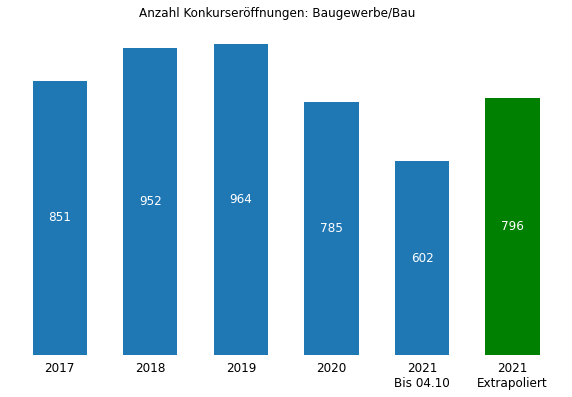

In [34]:
plot_chart("Baugewerbe/Bau")

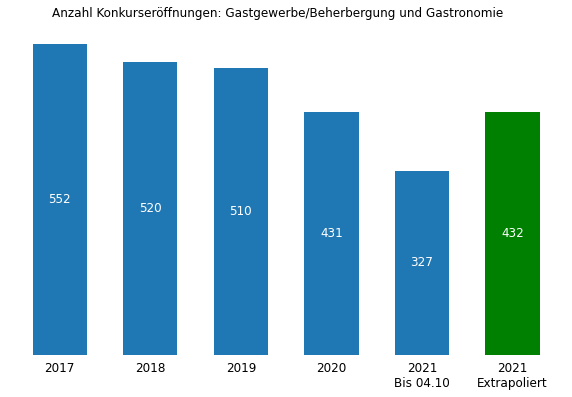

In [35]:
plot_chart("Gastgewerbe/Beherbergung und Gastronomie")

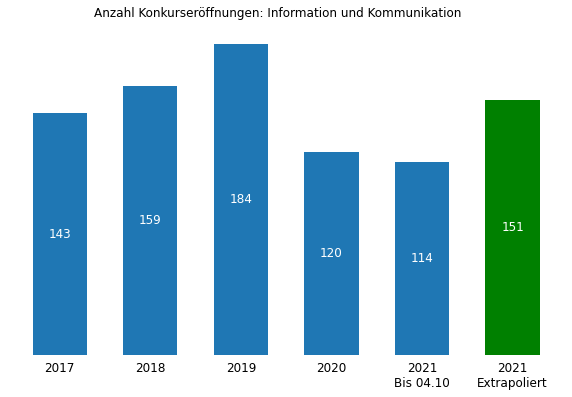

In [36]:
plot_chart("Information und Kommunikation")

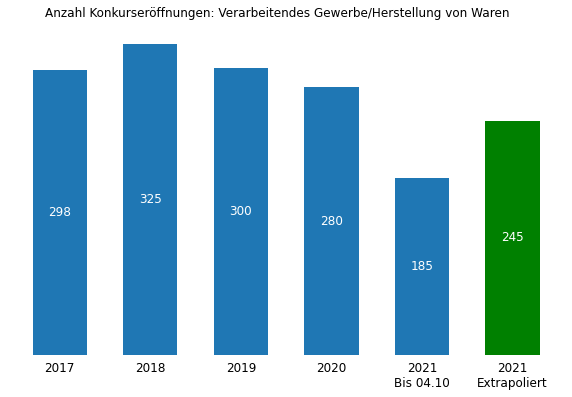

In [39]:
plot_chart("Verarbeitendes Gewerbe/Herstellung von Waren")

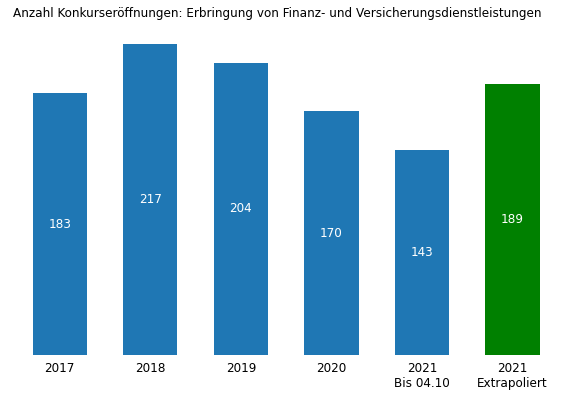

In [40]:
plot_chart("Erbringung von Finanz- und Versicherungsdienstleistungen")

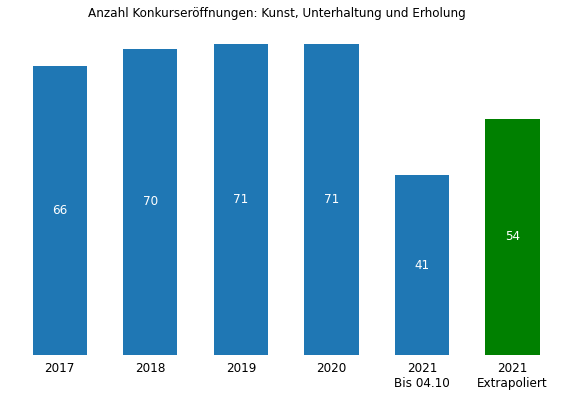

In [38]:
plot_chart("Kunst, Unterhaltung und Erholung")